### 목표 : 무게에 따른 길이를 예측해주는 모델
    - 데이터  : fish.csv
- feature : Weight
- target  : Length

In [33]:
# 0. 모듈 준비
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [34]:
# 1. 데이터 준비
fish_df = pd.read_csv('../DATA/fish.csv', usecols=[0,1,2])
fish_df.head(), fish_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length   159 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.9+ KB


(  Species  Weight  Length
 0   Bream   242.0    25.4
 1   Bream   290.0    26.3
 2   Bream   340.0    26.5
 3   Bream   363.0    29.0
 4   Bream   430.0    29.0,
 None)

In [35]:
# 1-2. 학습에 사용할 데이터 추출 => Perch행 추출
mask = fish_df['Species'].isin(['Perch'])
perch_df = fish_df[mask]
perch_df.info(), perch_df

<class 'pandas.core.frame.DataFrame'>
Index: 56 entries, 72 to 127
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  56 non-null     object 
 1   Weight   56 non-null     float64
 2   Length   56 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.8+ KB


(None,
     Species  Weight  Length
 72    Perch     5.9     8.4
 73    Perch    32.0    13.7
 74    Perch    40.0    15.0
 75    Perch    51.5    16.2
 76    Perch    70.0    17.4
 77    Perch   100.0    18.0
 78    Perch    78.0    18.7
 79    Perch    80.0    19.0
 80    Perch    85.0    19.6
 81    Perch    85.0    20.0
 82    Perch   110.0    21.0
 83    Perch   115.0    21.0
 84    Perch   125.0    21.0
 85    Perch   130.0    21.3
 86    Perch   120.0    22.0
 87    Perch   120.0    22.0
 88    Perch   130.0    22.0
 89    Perch   135.0    22.0
 90    Perch   110.0    22.0
 91    Perch   130.0    22.5
 92    Perch   150.0    22.5
 93    Perch   145.0    22.7
 94    Perch   150.0    23.0
 95    Perch   170.0    23.5
 96    Perch   225.0    24.0
 97    Perch   145.0    24.0
 98    Perch   188.0    24.6
 99    Perch   180.0    25.0
 100   Perch   197.0    25.6
 101   Perch   218.0    26.5
 102   Perch   300.0    27.3
 103   Perch   260.0    27.5
 104   Perch   265.0    27.5
 105   

In [36]:
# 1-3. 인덱스 정리
perch_df = perch_df.reset_index(drop=True)
perch_df.head()

,Species,Weight,Length
0,Perch,5.9,8.4
1,Perch,32.0,13.7
2,Perch,40.0,15.0
3,Perch,51.5,16.2
4,Perch,70.0,17.4


<hr>

### 3) 데이터 전처리
- 결측치, 이상치, 중복값 처리
- 데이터 분포, 컬럼 분포, 최빈값, 고유값

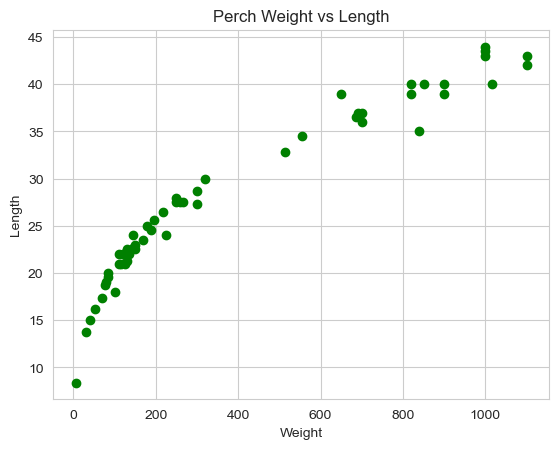

In [37]:
# 3-1. 데이터 분포
# 1) 무게와 길이에 대한 시각화
plt.plot(perch_df['Weight'], perch_df['Length'], 'go')
plt.xlabel('Weight'), plt.ylabel('Length')
plt.title('Perch Weight vs Length')
plt.show()

In [38]:
# 2) 무게와 길이에 대한 상관 계수
perch_df.corr(numeric_only=True)

,Weight,Length
Weight,1.000000,0.958656
Length,0.958656,1.000000


In [39]:
# [ 분석 결과 ] 무게에 따른 길이는 비례 관계
# 무게 + 연산 => 길이


In [40]:
# 3 가지 자료로 연관성을 찾아보기
perch_df.iloc[:3]

,Species,Weight,Length
0,Perch,5.9,8.4
1,Perch,32.0,13.7
2,Perch,40.0,15.0


In [41]:

model = (perch_df.Weight / 5) + 7
model - perch_df.Length     # index 80부터 10이상 차이난다

0      -0.22
1      -0.30
2       0.00
3       1.10
4       3.60
5       9.00
6       3.90
7       4.00
8       4.40
9       4.00
10      8.00
11      9.00
12     11.00
13     11.70
14      9.00
15      9.00
16     11.00
17     12.00
18      7.00
19     10.50
20     14.50
21     13.30
22     14.00
23     17.50
24     28.00
25     12.00
26     20.00
27     18.00
28     20.80
29     24.10
30     39.70
31     31.50
32     32.50
33     29.50
34     29.00
35     38.30
36     41.00
37     77.00
38     83.70
39    140.00
40    107.50
41    111.00
42    110.00
43    108.00
44    148.00
45     98.00
46    132.00
47    137.00
48    147.00
49    170.00
50    131.00
51    185.00
52    164.00
53    184.00
54    163.50
55    163.00
dtype: float64

<hr>

### 4) 학습 진행
- 학습 방법 : 지도학습 + 회귀(예측) => 선형회귀 LinearRegression

In [42]:
# 모델 인스턴스 생성
model = LinearRegression()
# 학습
# model.fit(perch_df[['Weight']]) # 1차원이라 오류 발생
model.fit(perch_df[['Weight']], perch_df['Length'])

LinearRegression()

In [43]:
# 학습 후 속성 확인
print('피처에 할당되는 가중치 계수 :', model.coef_[0]) # array로 반환
print('수식에 사용되는 절편 계수 :', model.intercept_)

피처에 할당되는 가중치 계수 : 0.024879845124891074
수식에 사용되는 절편 계수 : 18.382802913636723


In [44]:
# 수식 생성
(perch_df['Weight'] * model.coef_[0]) + model.intercept_

0     18.529594
1     19.178958
2     19.377997
3     19.664115
4     20.124392
5     20.870787
6     20.323431
7     20.373191
8     20.497590
9     20.497590
10    21.119586
11    21.243985
12    21.492784
13    21.617183
14    21.368384
15    21.368384
16    21.617183
17    21.741582
18    21.119586
19    21.617183
20    22.114780
21    21.990380
22    22.114780
23    22.612377
24    23.980768
25    21.990380
26    23.060214
27    22.861175
28    23.284132
29    23.806609
30    25.846756
31    24.851563
32    24.975962
33    24.602764
34    24.602764
35    25.846756
36    26.344353
37    31.171043
38    32.215997
39    39.281873
40    35.425497
41    35.798695
42    35.798695
43    35.549896
44    40.774664
45    34.554702
46    38.784276
47    39.530671
48    40.774664
49    43.635846
50    38.784276
51    45.750633
52    43.262648
53    45.750633
54    43.262648
55    43.262648
Name: Weight, dtype: float64

<hr>

### 5) 테스트 (아래 정확한 개념으로 정리되어 있음 R2)

In [45]:
# 정확도 확인
model.score(perch_df[['Weight']], perch_df['Length'])

0.919021073244782

### 오후 수업
1. (개념) 최적 적합
2. (개념) 선형 회귀

In [48]:
# 과대 적합 (Overfitting) 
# : 훈련 데이터셋에 특화되어 시험에 오차가 큰 것
#   (너무 훈련값 회귀에 정확함)
#   우린 predict() 에서 점수가 높아야 함

# 과소 적합
# : 훈련 데이터셋 조차 맞추지 못하는 것

# 최적 적합
# : 훈련 데이터셋의 규칙이 일반화된 모델
#   조건:
#   1. 편중되지 않고 다양함
#   2. 양질의 많은 데이터
#   3. 적정 모델 복잡도

# [ 선형 회귀 Linear Regression ]
# - 종류
#   - 회귀 : 선형, 다항, 다중 회귀
#   - 분류 : 로지스틱만 분류

# - 목표 : 오차를 최소화!!
#          -> 비용/손실함수
#             예) Mean Square Error ((예측-실제)^2)

# [ R^2 ] 
# : 회귀 모델의 정확도 지표
#   1.0에 가까울 수록 좋은 것; 오차가 작다는 뜻

### 5) 테스트

In [50]:
# 결정 계수 R2 
# : 얼마나 정답에 근사하게 결과를 예측해내는지를 나타내는 계수값
#   1.0에 가까울 수록 좋은 것; 오차가 작다는 뜻
model.score(perch_df[['Weight']], perch_df['Length'])

0.919021073244782

In [52]:
# 예측값
y_pre = model.predict(perch_df[['Weight']])
# 오차값 
error_sr = y_pre.round(1) - perch_df.Length
# => R2
(error_sr**2).sum() / error_sr.shape[0]

6.483571428571426

In [54]:
# 정답과 완벽하게 똑같은 갯수 찾기
error_sr[ error_sr == 0]    # 1개 맞춤

24    0.0
Name: Length, dtype: float64

<hr>
모듈로 한 방에 할 수 있다

### 6) 성능평가 : R2 찾는 모듈
- 결정계수 값 : 1.0 에 가까울 수록 좋음
- 오차평균 값 : 0.0 에 가까울 수록 (낮을 수록) 좋음
- 활용 모듈   : sklearn.metrics

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [65]:
import sklearn
print(sklearn.__version__) #해봐 해봐해봐해
# 성능평가
# : 성능평가 지표는 의뢰측에서 설정

# 1) R2 : 결정 계수 값 ~1.0
r2_score(perch_df.Length, y_pre)    # 0.91902
# 2) MSE : 평균제곱오차 0~
mean_squared_error(perch_df.Length, y_pre)  # 6.4732
# 3) MAE : 평균 절대값 오차 0~
mean_absolute_error(perch_df.Length, y_pre) # 1.851505
# 4) RMSE : 루트 평균제곱오차 
#           1.4버전에 추가
mean_squared_error(perch_df.Length, y_pre, squared=False)

1.3.0


2.5442523272804674

In [ ]:
# HD현대 AI Challenge
# - 규칙 항목에 평가기준 : MAE 로 나와 있음
# - public score 30%
# - private score 70%
# - 결과 제출 시 private score 기준
# https://dacon.io/competitions/official/236158/overview/rules

03_fish_KNN_Regression.ipyb 로 이동 오키